In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set_theme()

In [105]:
cac40 = yf.download('^FCHI', start='2010-01-01', end='2024-04-01')

[*********************100%%**********************]  1 of 1 completed


In [106]:
cac40.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3.643000e+03
mean,5001.732028,5033.162711,4968.033651,5001.725887,5001.725887,1.034613e+08
std,1207.121804,1209.777403,1206.128459,1208.292903,1208.292903,4.887321e+07
min,2754.820068,2823.969971,2693.209961,2781.679932,2781.679932,0.000000e+00
25%,4049.144897,4073.300049,4018.795044,4050.119995,4050.119995,7.250945e+07
50%,4895.029785,4926.560059,4859.759766,4895.459961,4895.459961,9.378900e+07
75%,5647.239990,5669.829834,5623.405029,5652.205078,5652.205078,1.267732e+08
max,8228.709961,8253.589844,8205.809570,8205.809570,8205.809570,4.385013e+08


In [107]:
cac40.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,3952.209961,4013.969971,3950.610107,4013.969971,4013.969971,113396000
2010-01-05,4012.429932,4028.340088,3993.330078,4012.909912,4012.909912,129518600
2010-01-06,4014.449951,4022.939941,3996.800049,4017.669922,4017.669922,110087000
2010-01-07,4005.959961,4032.239990,3983.899902,4024.800049,4024.800049,118430400
2010-01-08,4042.639893,4051.409912,4013.340088,4045.139893,4045.139893,131783200


In [108]:
cac40['log_returns'] = 100*np.log(cac40['Close'] / cac40['Close'].shift(1))
cac40.head()

,Open,High,Low,Close,Adj Close,Volume,log_returns
Date,,,,,,,
2010-01-04,3952.209961,4013.969971,3950.610107,4013.969971,4013.969971,113396000,NaN
2010-01-05,4012.429932,4028.340088,3993.330078,4012.909912,4012.909912,129518600,-0.026413
2010-01-06,4014.449951,4022.939941,3996.800049,4017.669922,4017.669922,110087000,0.118547
2010-01-07,4005.959961,4032.239990,3983.899902,4024.800049,4024.800049,118430400,0.177312
2010-01-08,4042.639893,4051.409912,4013.340088,4045.139893,4045.139893,131783200,0.504090


In [109]:
# compute conditional volatility
cac40['cond_vol'] = cac40['log_returns'].rolling(21).std()
cac40.head()

,Open,High,Low,Close,Adj Close,Volume,log_returns,cond_vol
Date,,,,,,,,
2010-01-04,3952.209961,4013.969971,3950.610107,4013.969971,4013.969971,113396000,NaN,NaN
2010-01-05,4012.429932,4028.340088,3993.330078,4012.909912,4012.909912,129518600,-0.026413,NaN
2010-01-06,4014.449951,4022.939941,3996.800049,4017.669922,4017.669922,110087000,0.118547,NaN
2010-01-07,4005.959961,4032.239990,3983.899902,4024.800049,4024.800049,118430400,0.177312,NaN
2010-01-08,4042.639893,4051.409912,4013.340088,4045.139893,4045.139893,131783200,0.504090,NaN


In [126]:
cac40['volatility'] = cac40['log_returns'].rolling(window=15).std()
cac40.head()

,Open,High,Low,Close,Adj Close,Volume,log_returns,cond_vol,volatility
Date,,,,,,,,,
2010-01-04,3952.209961,4013.969971,3950.610107,4013.969971,4013.969971,113396000,NaN,NaN,NaN
2010-01-05,4012.429932,4028.340088,3993.330078,4012.909912,4012.909912,129518600,-0.026413,NaN,NaN
2010-01-06,4014.449951,4022.939941,3996.800049,4017.669922,4017.669922,110087000,0.118547,NaN,NaN
2010-01-07,4005.959961,4032.239990,3983.899902,4024.800049,4024.800049,118430400,0.177312,NaN,NaN
2010-01-08,4042.639893,4051.409912,4013.340088,4045.139893,4045.139893,131783200,0.504090,NaN,NaN


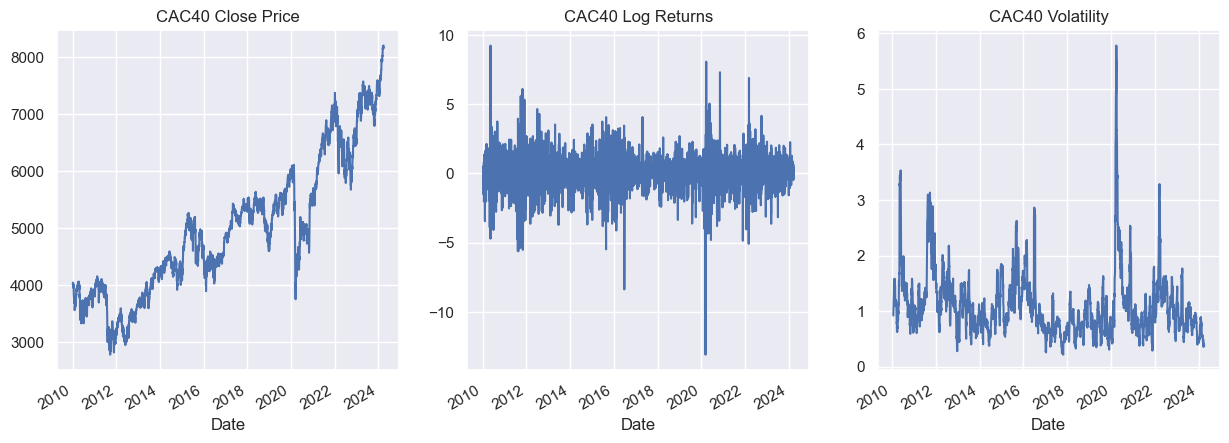

In [127]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
cac40['Close'].plot(title='CAC40 Close Price')
plt.subplot(1, 3, 2)
cac40['log_returns'].plot(title='CAC40 Log Returns')
plt.subplot(1, 3, 3)
cac40['volatility'].plot(title='CAC40 Volatility')
plt.show()

In [128]:
# fitting a GARCH model to the CAC40 log returns
from arch import arch_model

log_ret = cac40['log_returns'].dropna().to_numpy()

train_size = int(0.8 * len(log_ret))
train, test = log_ret[:train_size], log_ret[train_size:]
vol_test = cac40['volatility'].dropna().to_numpy()[train_size:]

model = arch_model(train, mean='Zero', vol='GARCH', p=1, q=1)
model_fit = model.fit(disp='off')
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4457.52
Distribution:                  Normal   AIC:                           8921.03
Method:            Maximum Likelihood   BIC:                           8938.96
                                        No. Observations:                 2913
Date:                Sun, Apr 14 2024   Df Residuals:                     2913
Time:                        21:56:28   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0408  1.325e-02      3.078  2.087e-03 [1.481e-02,6.676e-02]
alpha[1]       0.1268  2.684e-02      4.726  2.290e-06   [7.424e-02,  0.179]
beta[1]        0.8522  2.884e-02     29.547 7.084e-192     [  0.796,  0.909]
============================================================================

Covariance estimator: robust
"""